# Chapter 5 Computer Lab 1 HIV/Bacteria

import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import the hiv experimental data

In [4]:
hiv_data_file = "pmls-data-master/01HIVseries/HIVseries.csv"
hiv_data = np.loadtxt(hiv_data_file, delimiter=',')
hiv_num_days = np.array(hiv_data[:,0])
hiv_num_virons = np.array(hiv_data[:,1])
print('hiv data read')

hiv data read


display the hiv data

In [5]:
print("HIV experimental data")
print("______________________")
print("number of days since start of antiretroviral treatment:")
print(hiv_num_days)
print()
print("number of virons in the blood:")
print(hiv_num_virons)

HIV experimental data
______________________
number of days since start of antiretroviral treatment:
[0.     0.0831 0.1465 0.2587 0.4828 0.7448 0.9817 1.2563 1.4926 1.7299
 1.9915 3.0011 4.0109 5.009  5.9943 7.0028]

number of virons in the blood:
[106100.   93240.  166720.  153780.  118800.  116900.  109570.  111350.
  74388.   83291.   66435.   35408.   21125.   20450.   15798.    4785.2]


# $V(t) = Ae^{-at} + Be^{-bt}$

looking at the data above we can see in the recorded data that 

$V(0) = 106100 $

        & 

$V(7.0028) = 4785.2$

assume $B = 0$

In [6]:
B = 0
print(f"B= {B}")

B= 0


assume B = 0

assume beta > alpha

at $V(t=0)$ with $B=0$ we get:

$V(0) = Ae^{-a*0} + 0$


at $V(7.0028)$ with $B=0$ we get:

$V(7,0028) = Ae^{-a*7.0028} + 0$ 


we know the value of $V(0)$ and $V(7.0028)$:

$V(0) = A = 106100$


$V(7.0028) = Ae^{-a*7.0028} = 4785.2$

setting the value of A for $V(7.0028)$ we get:

$V(7.0028) = 106100e^{-a*7.0028} = 4785.2$

$e^{-a*7.0028} = \frac{4785.2}{106100}$

solving for alpha we get:

$\alpha = \frac{2500(log(2) + 3log(5) - log(7) + log(1061) - log(1709))}{17507} = 0.442516$


In [13]:
B = 0
A = 106100
beta = 1
alpha = 0.442516

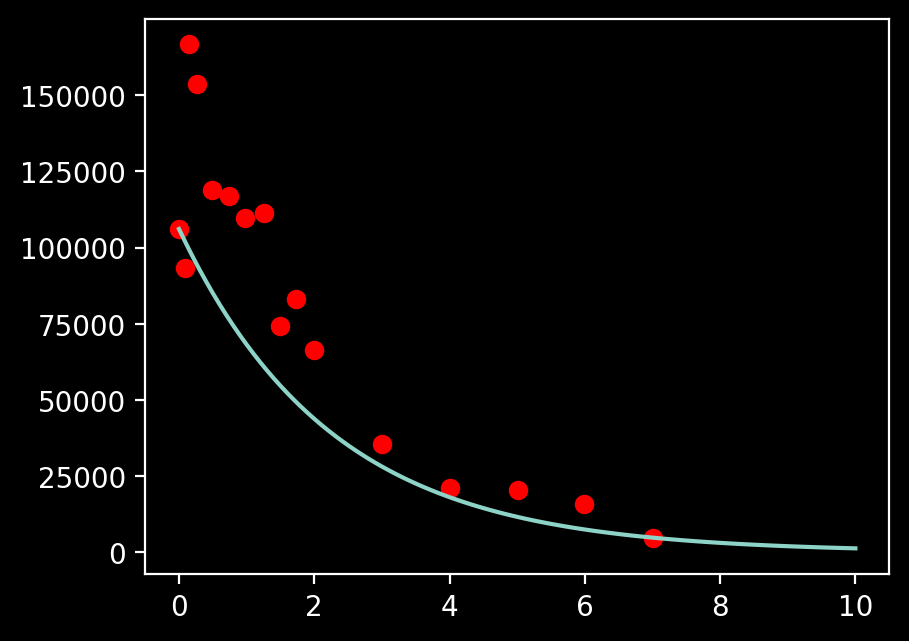

In [14]:
plt.plot(hiv_num_days, hiv_num_virons, 'ro')
t = np.linspace(0, 10, 101)
v_t = A*np.e**(-alpha*t) + B*np.e**(-beta*t)
plt.plot(t, v_t)

alternative parameters where B=0 still and beta > alpha but paramets tuned by adjustments to $10^x$

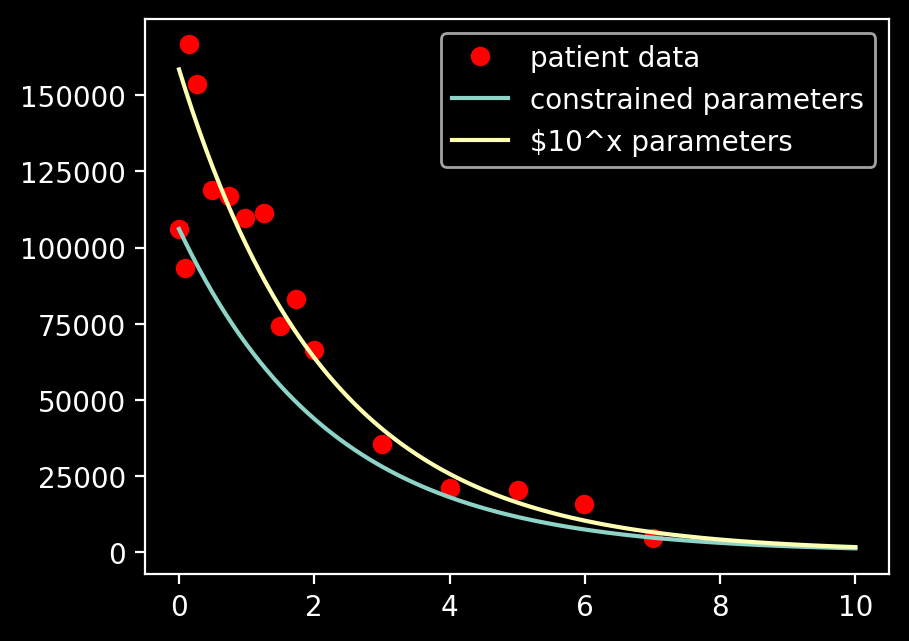

In [21]:
# original parameters
B = 0
A = 106100
beta = 1
alpha = 0.442516

plt.plot(hiv_num_days, hiv_num_virons, 'ro', label="patient data")
t = np.linspace(0, 10, 101)
v_t = A*np.e**(-alpha*t) + B*np.e**(-beta*t)
plt.plot(t, v_t, label="constrained parameters")

# alternative parameters
A = 10**5.2
B = 0
alpha = 10**1/22
beta = 10**0

v_t = A*np.e**(-alpha*t) + B*np.e**(-beta*t)
plt.plot(t, v_t, label="$10^x parameters")

plt.legend()